# Data Preparation

[]

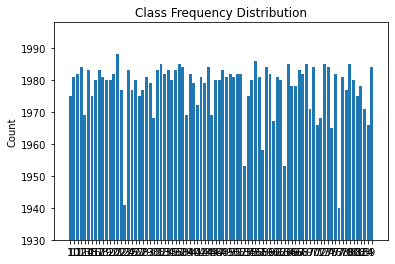

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os, shutil

dataset_path = "./BanglaLekha_Dataset/Images"

label_freq = defaultdict(int)
if os.path.exists(os.path.join(dataset_path, 'train')):
    classes = os.listdir(os.path.join(dataset_path, 'train'))
    for i in classes:
        label_freq[i] = len(os.listdir(os.path.join(dataset_path, 'train', i))) + len(os.listdir(os.path.join(dataset_path, 'test', i)))
else :
    classes = os.listdir(dataset_path)
    for i in classes :
        label_freq[i] = len(os.listdir(os.path.join(dataset_path, i)))

plt.bar(label_freq.keys(), label_freq.values())
#plt.xlabel('Character ID')
plt.ylabel('Count')
plt.title('Class Frequency Distribution')
plt.ylim(min(label_freq.values())-10, max(label_freq.values())+10)
plt.plot()

In [35]:
avg_img_per_class = sum(label_freq.values())/len(label_freq.values())
print(f"Average number of characters present per class = {avg_img_per_class:.4f}")

print("Number of Classes having less images than average =>", end=' ')
count = 0
for (i, v) in label_freq.items():
    if v <= avg_img_per_class:
        count +=1
print(f"{count}")

min_img = min(label_freq.values())
max_img = max(label_freq.values())
print(f"Maximum images a class has : {max_img}\nMinimum images a class has : {min_img}")


Average number of characters present per class = 1977.4405
Number of Classes having less images than average => 26
Maximum images a class has : 1988
Minimum images a class has : 1940


In [36]:
classes = list(label_freq.keys())
train_size = min_img - 10

if not os.path.exists(os.path.join(dataset_path, 'train')):
    os.mkdir(os.path.join(dataset_path, 'train'))

    for i in classes :
        os.mkdir(os.path.join(dataset_path, 'train', i))

if not os.path.exists(os.path.join(dataset_path, 'test')):
    os.mkdir(os.path.join(dataset_path, 'test'))

    for i in classes :
        os.mkdir(os.path.join(dataset_path, 'test', i))

if len(os.listdir(os.path.join(dataset_path, 'train', classes[0])))==0 :
    for i in classes :
        all_images = os.listdir(os.path.join(dataset_path, i))

        for img in all_images[:train_size]:
            shutil.move(os.path.join(dataset_path, i, img), os.path.join(dataset_path, 'train', i, img))
        
        for img in all_images[train_size:]:
            shutil.move(os.path.join(dataset_path, i, img), os.path.join(dataset_path, 'test', i, img))
        
        if len(os.listdir(os.path.join(dataset_path, i)))==0:
            os.rmdir(os.path.join(dataset_path, i))

train_size = 0
test_size = 0
for i in classes :
    train_size += len(os.listdir(os.path.join(dataset_path, 'train', i)))
    test_size += len(os.listdir(os.path.join(dataset_path, 'test', i)))

print(f"Total Training samples = {train_size}\nTotal Validation/Test samples = {test_size}")

Total Training samples = 162120
Total Validation/Test samples = 3985


TRAIN :
Maximum number of items in a class = 1930
Minimum number of items in a class = 1930

VALIDATION/TEST :
Maximum number of items in a class = 58
Minimum number of items in a class = 10


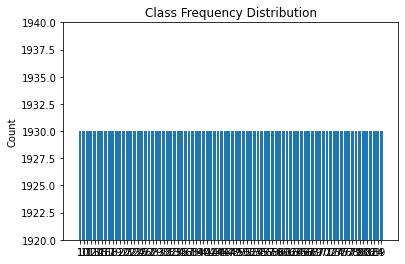

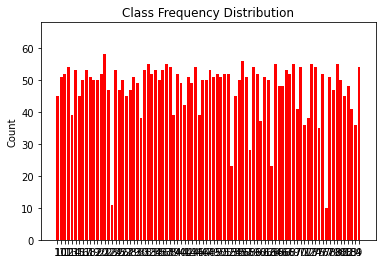

In [37]:
train_dict = defaultdict(int)
test_dict = defaultdict(int)

if os.path.exists(os.path.join(dataset_path, 'train')):
    classes = os.listdir(os.path.join(dataset_path, 'train'))
    for i in classes :
        train_dict[i] = len(os.listdir(os.path.join(dataset_path, 'train', i)))
        test_dict[i] = len(os.listdir(os.path.join(dataset_path, 'test', i)))

print(f"TRAIN :\nMaximum number of items in a class = {max(train_dict.values())}\nMinimum number of items in a class = {min(train_dict.values())}")
print(f"\nVALIDATION/TEST :\nMaximum number of items in a class = {max(test_dict.values())}\nMinimum number of items in a class = {min(test_dict.values())}")

plt.bar(train_dict.keys(), train_dict.values())
#plt.xlabel('Character ID')
plt.ylabel('Count')
plt.title('Class Frequency Distribution')
plt.ylim(min(train_dict.values())-10, max(train_dict.values())+10)
plt.show()

plt.bar(test_dict.keys(), test_dict.values(), color='red')
#plt.xlabel('Character ID')
plt.ylabel('Count')
plt.title('Class Frequency Distribution')
plt.ylim(min(test_dict.values())-10, max(test_dict.values())+10)
plt.show()

Actual Image size = (224, 224)


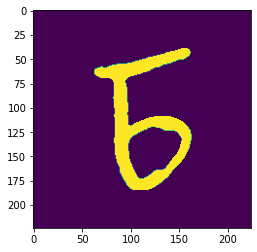

In [38]:
from PIL import Image

random_index_class = str(np.random.randint(1, 84))
all_images = os.listdir(os.path.join(dataset_path, 'train', random_index_class))

random_index_image = np.random.randint(1, len(all_images))
a = Image.open(os.path.join(dataset_path, 'train', random_index_class, all_images[random_index_image]))
plt.imshow(np.asarray(a))

print(f"Actual Image size = {a.size}")

In [39]:
"""import torchvision.transforms.functional as TF
import math

def resize(img, size):
    left = math.ceil((size - img.size[0])/2)
    top = math.floor((size - img.size[1])/2)
    right = math.floor((size - img.size[0])/2)
    bottom = math.ceil((size - img.size[1])/2)
    resized = TF.pad(img, (left, top, right, bottom))
    return resized

plt.imshow(np.asarray(resize(a, 224)))"""

'import torchvision.transforms.functional as TF\nimport math\n\ndef resize(img, size):\n    left = math.ceil((size - img.size[0])/2)\n    top = math.floor((size - img.size[1])/2)\n    right = math.floor((size - img.size[0])/2)\n    bottom = math.ceil((size - img.size[1])/2)\n    resized = TF.pad(img, (left, top, right, bottom))\n    return resized\n\nplt.imshow(np.asarray(resize(a, 224)))'

## Resizing Images
Run this cell again ONLY if you wish to resize the images. Else DON'T RUN.

In [40]:
# Execution time = 10m 18.8s
"""
target = 224

for split in ['train', 'test']:
    for label in classes :
        all_images = os.listdir(os.path.join(dataset_path, split, label))
        for image in all_images :
            img = Image.open(os.path.join(dataset_path, split, label, image))
            resized = resize(img, target)
            resized.save(os.path.join(dataset_path, split, label, image))
"""

"\ntarget = 224\n\nfor split in ['train', 'test']:\n    for label in classes :\n        all_images = os.listdir(os.path.join(dataset_path, split, label))\n        for image in all_images :\n            img = Image.open(os.path.join(dataset_path, split, label, image))\n            resized = resize(img, target)\n            resized.save(os.path.join(dataset_path, split, label, image))\n"

# CNN Classifier

In [41]:
import torch, torchvision
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train = ImageFolder(os.path.join(dataset_path, 'train'), transform=transform)
val = ImageFolder(os.path.join(dataset_path, 'test'), transform=transform)

batch_size = 16
train_dl = DataLoader(train, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(val, batch_size=batch_size)

train = None
val = None

print(f"Number of Train batches : {len(train_dl)}\nNumber of Test batches : {len(test_dl)}")

Number of Train batches : 10133
Number of Test batches : 250


In [42]:
from torchvision.models import resnet50
model = resnet50(pretrained = False)
model.fc = torch.nn.Linear(in_features = 2048, out_features = len(classes), bias = True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Available resource : {device}")
if device=='cuda':
    print(f"Available number of GPU's : {torch.cuda.device_count()}")
    torch.cuda.empty_cache()

model = model.to(device)
!nvidia-smi

Available resource : cuda
Available number of GPU's : 1
Tue Aug  8 16:17:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8     9W /  N/A |   1024MiB /  6144MiB |     40%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                

In [43]:
def train(model, criterion, optimizer, scheduler, dataloader, device):
    model.train()
    total_loss = 0
    correct = 0
    #grad_acc_step = 4
    #grad_acc_factor = 0.5
    #print("Training ...")
    batch = 0
    total = 0
    for imgs, labels_y in dataloader:
        #print(f"Batch : {batch}")
        imgs = imgs.to(device)
        labels_y = labels_y.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        _, pred = torch.max(output.data, 1)
        loss = criterion(output, labels_y)
        loss.backward()
        total_loss += loss.item() * imgs.size(0)
        correct += torch.sum(pred == labels_y.data)
        total += labels_y.size(0)

        #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.2)
        """model_copy = model
        if (batch + 1) % grad_acc_step == 0:
            for param in model.parameters():
                if param.requires_grad == True:
                    param *= grad_acc_factor"""

        optimizer.step()
        
        batch += 1
        del imgs
        del labels_y
        del output
        gc.collect()
        torch.cuda.empty_cache()
 
    return correct/total, total_loss / len(dataloader)

def evaluate(model, criterion, dataloader, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    #print("Evaluation ...")
    batch = 0
    total = 0
    with torch.no_grad():
        for imgs, labels_y in dataloader:
            imgs = imgs.to(device)
            labels_y = labels_y.to(device)

            output = model(imgs)
            _, pred = torch.max(output.data, 1)
            loss = criterion(output, labels_y)
            correct += torch.sum(pred == labels_y.data)
            epoch_loss += loss.item() * imgs.size(0)
            
            total += labels_y.size(0)
            batch += 1
            del imgs
            del labels_y
            del output
            gc.collect()
            torch.cuda.empty_cache()
 
    return correct/total, epoch_loss/len(dataloader)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_hrs = int(elapsed_time / 3600)
    elapsed_mins = int((elapsed_time - elapsed_hrs * 3600) / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60 + elapsed_hrs * 3600))
    return elapsed_hrs,  elapsed_mins, elapsed_secs

class EarlyStopper :
    def __init__(self, patience = 5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [44]:
import numpy as np
from torch.optim import Adam, lr_scheduler
from torch import nn
import copy, time, gc

optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0004)
criterion = nn.CrossEntropyLoss()
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

epochs = 100

best_valid_loss = np.inf
best_model = copy.deepcopy(model.state_dict())

train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []
c = 0
earlystopper = EarlyStopper()
start = time.time()
for epoch in range(1, epochs+1):
    print(f'\nEpoch: {epoch:02}\tlearning rate : {scheduler.get_last_lr()}\n')

    start_epoch = time.time()
    train_acc, train_loss = train(model, criterion, optimizer, scheduler, train_dl, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc.to('cpu'))
    val_acc, val_loss = evaluate(model, criterion, test_dl, device)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc.to('cpu'))
    end_epoch = time.time()

    _, epoch_mins, epoch_seconds = epoch_time(start_epoch, end_epoch)

    print(f'Time: {epoch_mins}m {epoch_seconds}s') 
    print(f'Train Loss: {train_loss:.3f}')
    print(f'Val   Loss: {val_loss:.3f}')

    c+=1

    if val_loss < best_valid_loss :
        best_valid_loss = val_loss
        best_model = copy.deepcopy(model.state_dict())
        print(f"Model recorded with Validation loss : {val_loss}\n")
        c = 0
    
    if c > 4 :
        scheduler.step()
        c = 0

    if earlystopper.early_stop(val_loss):
        print(f"\nModel is not improving. Quitting ...\n")
        break

    torch.cuda.empty_cache()

end = time.time()
train_h, train_m, train_s = epoch_time(start, end)
print(f"Total training time : {train_h}hrs. {train_m}mins. {train_s}s")

name = f'banglalekha_pytorch_{epoch}_{best_valid_loss:.4f}.pth'
best_model = best_model.to('cpu')
torch.save(best_model.state_dict(), name)


Epoch: 01	learning rate : [0.001]

Time: 57m 8s
Train Loss: 20.064
Val   Loss: 7.834
Model recorded with Validation loss : 7.834328602284193


Epoch: 02	learning rate : [0.001]

Time: 48m 41s
Train Loss: 8.535
Val   Loss: 8.890

Epoch: 03	learning rate : [0.001]

Time: 46m 56s
Train Loss: 7.478
Val   Loss: 6.745
Model recorded with Validation loss : 6.745184257268906


Epoch: 04	learning rate : [0.001]

Time: 45m 5s
Train Loss: 6.945
Val   Loss: 6.476
Model recorded with Validation loss : 6.4758390854001044


Epoch: 05	learning rate : [0.001]

Time: 44m 10s
Train Loss: 6.669
Val   Loss: 5.905
Model recorded with Validation loss : 5.9045655903816225


Epoch: 06	learning rate : [0.001]

Time: 50m 26s
Train Loss: 6.440
Val   Loss: 5.788
Model recorded with Validation loss : 5.7880250838398934


Epoch: 07	learning rate : [0.001]

Time: 57m 59s
Train Loss: 6.317
Val   Loss: 5.744
Model recorded with Validation loss : 5.7442695647291835


Epoch: 08	learning rate : [0.001]

Time: 49m 14s
Tra

Optimal point : 14 epoch with Val Accuracy 0.9111668467521667
Optimal point : 14 epoch with Val loss 4.969298805145547


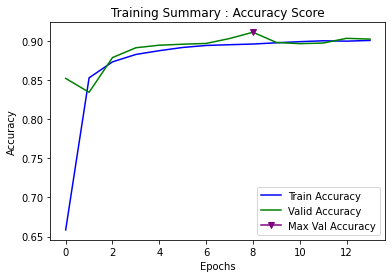

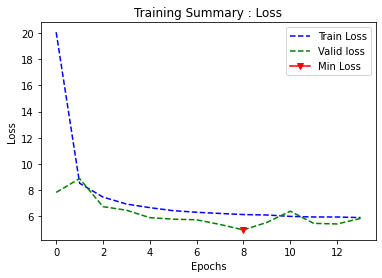

In [47]:
def generatePlots(train_list, val_list, fig_path, plot_type = 'loss'):
    if plot_type == 'loss':
        if len(train_list) == 0 or len(val_list) == 0:
            print("List empty")
        else:
            min_val_loss = min(val_list)
            epoch_loss = val_loss_list.index(min_val_loss)
            print(f"Optimal point : {epoch} epoch with Val loss {min_val_loss}")
            plt.figure()
            plt.plot(range(len(train_list)), train_list, color='blue', label='Train Loss', linestyle='dashed')
            plt.plot(range(len(val_list)), val_list, color='green', label='Valid loss', linestyle='dashed')
            plt.plot(epoch_loss, min_val_loss, marker = 'v', color = 'red', label = 'Min Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training Summary : Loss')
            plt.legend()
            plt.savefig(fig_path)
    elif plot_type == 'acc':
        if len(train_acc_list) == 0 or len(val_acc_list) == 0 :
            print("List empty")
        else:
            max_val_acc = max(val_list)
            epoch_acc = val_list.index(max_val_acc)
            print(f"Optimal point : {epoch} epoch with Val Accuracy {max_val_acc}")
            plt.figure()
            plt.plot(range(len(train_list)), train_list, color='blue', label='Train Accuracy')
            plt.plot(range(len(val_list)), val_list, color='green', label='Valid Accuracy')
            plt.plot(epoch_acc, max_val_acc, marker = 'v', color = 'purple', label='Max Val Accuracy')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.title('Training Summary : Accuracy Score')
            plt.legend()
            plt.savefig(fig_path)
    else :
        print("Invalid plot type")

if device == 'cuda':
    train_acc_list = [i.to('cpu') for i in train_acc_list]
    #train_loss_list = [i.to('cpu') for i in train_loss_list]
    val_acc_list = [i.to('cpu') for i in val_acc_list]
    #val_loss_list = [i.to('cpu') for i in val_loss_list]

generatePlots(train_acc_list, val_acc_list, fig_path='acc_plot.jpg', plot_type='acc')
generatePlots(train_loss_list, val_loss_list, fig_path='loss_plot.jpg', plot_type='loss')

In [57]:
name = f'banglalekha_pytorch_{epoch}_{best_valid_loss:.4f}.pth'
model.load_state_dict(best_model)
torch.save(model.state_dict(), name)

In [2]:
import torch
from torchvision.models import resnet50
import torch.nn as nn

name = 'banglalekha_pytorch_14_4.9693.pth' # Copy and paste the model name after running above tab

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model1 = resnet50()
model1.fc = nn.Linear(2048, len(classes), bias=True)
model1.load_state_dict(torch.load(name))
model1 = model1.to(device)

total = 0
correct1 = 0
correct2 = 0
with torch.no_grad():
    for (img, label) in test_dl:
        img, label = img.to(device), label.to(device)
        output = model1(img)
        _, predicted = torch.max(output.data, 1)
        total += label.size(0)
        correct1 += (predicted == label).sum().item()
        correct2 += torch.sum(predicted == label.data)
print(f"Accuracy on Test set : {correct1/total}, {correct2/total}")

NameError: name 'classes' is not defined